In [1]:
# Import dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

46.03087925822311 100.81563923020929
-81.85546765852843 100.73073583380773
60.19502930706321 31.333794517166098
14.728501594501424 61.92645855616877
-20.859383653382068 58.965248275785
-15.225253055179593 78.49068980869396
-82.22937636819448 125.9941738580618
-27.105476884982636 -149.61944669686397
29.507355278454654 -100.38388735431555
-77.9649954395698 -53.12234571451363
33.1189385018606 96.65919695520711
58.75454583035736 79.00767873890408
45.0735808386205 -77.63995445308521
-3.8743798703945203 -68.42934478438366
-80.80922682653022 3.541269960884051
38.602397171327425 -28.650026436017697
-16.341007918568167 -144.18870689856664
-31.626960358403934 -118.55902208007626
50.94928371720334 148.48783913258143
6.487733116441149 -156.7088875610352
-40.89299779581252 -72.48122417223523
-40.920175084800285 -109.61808715392414
60.52336225721544 30.638727526760817
42.174264113034525 -33.52734960646623
15.901579461418507 67.38158291136128
-80.48993877242312 -122.97407811796569
-31.175971994251725

-5.632785066931149 -18.797602417878892
60.85156547321057 124.20178920371302
19.206066289171133 93.60417968956807
-31.095040951603664 170.9735517919426
60.746244953164165 -146.41153966890363
56.524788096877586 163.61306334010771
-48.76759290641634 -14.255167665958652
-66.6080931949291 104.14615051295272
84.4085751527304 124.32221811896335
34.74501543651073 -91.95395703315617
46.94041614760408 94.06050448849766
87.41184434900285 -135.92845643445483
36.633489353465805 178.0499280031426
0.7715140078964566 23.876265913427773
-27.443479555872884 -20.797058785182315
-44.44134259209067 51.663677482097114
-10.200740415817549 161.50465283010698
49.39982163402587 -72.13833239378226
65.67888682195158 -132.65474616959293
-45.691137387255424 -153.76314121162062
-84.21594192235514 -64.75806212561487
-77.97185533527154 -128.2236286757783
79.50637416307549 -31.092502326161252
13.014347481974113 -14.267945700932302
22.108390987388475 117.9865888364427
-80.2459922536848 -121.29120251611707
-33.1753181841

-39.21612442931611 -95.65747567323466
-65.57256685721832 -64.84357866008375
26.906317315655897 -114.39263867761508
2.6646188089998475 -9.816008732019782
-55.59780523523247 69.12712270263523
0.005593864486002076 125.57336673439022
-72.7980798884588 46.49628932266393
58.54446709725272 118.51483405940263
-60.99314955621887 -59.909284679715626
85.37478949397746 -39.111316049520866
-51.015444701659575 -56.334536451361316
-83.26894801663485 60.874124005660576
70.56254272353905 -168.9220170908294
-39.13812474455639 -24.0741077676401
54.70870317880045 44.14405182012905
-51.69270811956944 39.74183478985452
11.486438212918785 97.3851801817002
73.98949414996514 97.64429632367353
-36.58479404244825 -103.42862177003893


In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

609

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | hovd
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | imeni morozova
Processing Record 4 of Set 1 | salalah
Processing Record 5 of Set 1 | bambous virieux
Processing Record 6 of Set 1 | hithadhoo
Processing Record 7 of Set 1 | new norfolk
Processing Record 8 of Set 1 | mataura
Processing Record 9 of Set 1 | del rio
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | pasighat
Processing Record 12 of Set 1 | kedrovyy
Processing Record 13 of Set 1 | madoc
Processing Record 14 of Set 1 | sao paulo de olivenca
Processing Record 15 of Set 1 | hermanus
Processing Record 16 of Set 1 | horta
Processing Record 17 of Set 1 | tautira
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | vostok
Processing Record 20 of Set 1 | hilo
Processing Record 21 of Set 1 | puerto varas
Processing Record 22 of Set 1 | garbolovo
Processing Record 23 of Set 1 | ribe

Processing Record 38 of Set 4 | buta
Processing Record 39 of Set 4 | hirara
Processing Record 40 of Set 4 | piro
Processing Record 41 of Set 4 | sarkand
Processing Record 42 of Set 4 | kodinsk
Processing Record 43 of Set 4 | saint-denis
Processing Record 44 of Set 4 | laguna
Processing Record 45 of Set 4 | kutum
Processing Record 46 of Set 4 | ancud
Processing Record 47 of Set 4 | kinlochleven
Processing Record 48 of Set 4 | coxim
Processing Record 49 of Set 4 | airai
Processing Record 50 of Set 4 | camacha
Processing Record 1 of Set 5 | ulladulla
Processing Record 2 of Set 5 | faanui
Processing Record 3 of Set 5 | praia
Processing Record 4 of Set 5 | cherskiy
Processing Record 5 of Set 5 | khatanga
Processing Record 6 of Set 5 | inongo
Processing Record 7 of Set 5 | palu
Processing Record 8 of Set 5 | semporna
Processing Record 9 of Set 5 | alice springs
Processing Record 10 of Set 5 | crotone
Processing Record 11 of Set 5 | marcona
City not found. Skipping...
Processing Record 12 of 

Processing Record 29 of Set 8 | fairbanks
Processing Record 30 of Set 8 | kartuzy
Processing Record 31 of Set 8 | cidreira
Processing Record 32 of Set 8 | oum hadjer
Processing Record 33 of Set 8 | buluang
Processing Record 34 of Set 8 | nizhniy kuranakh
Processing Record 35 of Set 8 | akyab
Processing Record 36 of Set 8 | palmer
Processing Record 37 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 38 of Set 8 | jacksonville
Processing Record 39 of Set 8 | erzin
Processing Record 40 of Set 8 | basoko
Processing Record 41 of Set 8 | kirakira
Processing Record 42 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 43 of Set 8 | inuvik
Processing Record 44 of Set 8 | velingara
Processing Record 45 of Set 8 | sioux lookout
Processing Record 46 of Set 8 | gornopravdinsk
Processing Record 47 of Set 8 | simplicio mendes
Processing Record 48 of Set 8 | sao joao da barra
Processing Record 49 of Set 8 | shchelyayur
City not found. Skipping...
Processing Record 

Processing Record 15 of Set 12 | dehloran
Processing Record 16 of Set 12 | zalegoshch
Processing Record 17 of Set 12 | palo negro
Processing Record 18 of Set 12 | rocha
Processing Record 19 of Set 12 | bakchar
Processing Record 20 of Set 12 | kieta
Processing Record 21 of Set 12 | doha
Processing Record 22 of Set 12 | promissao
Processing Record 23 of Set 12 | boende
Processing Record 24 of Set 12 | along
Processing Record 25 of Set 12 | staryy nadym
Processing Record 26 of Set 12 | khandyga
Processing Record 27 of Set 12 | flinders
Processing Record 28 of Set 12 | vredendal
Processing Record 29 of Set 12 | alta floresta
Processing Record 30 of Set 12 | trat
Processing Record 31 of Set 12 | luau
Processing Record 32 of Set 12 | samfya
Processing Record 33 of Set 12 | garm
City not found. Skipping...
Processing Record 34 of Set 12 | santa rosa
Processing Record 35 of Set 12 | baherden
Processing Record 36 of Set 12 | emerald
Processing Record 37 of Set 12 | fort dodge
Processing Record 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hovd,48.0056,91.6419,66.83,46,100,6.85,MN,2022-07-12 18:48:10
1,Albany,42.6001,-73.9662,90.64,48,6,4.00,US,2022-07-12 18:45:35
2,Imeni Morozova,59.9757,31.0376,71.02,93,97,8.68,RU,2022-07-12 18:48:11
3,Salalah,17.0151,54.0924,78.89,89,100,5.75,OM,2022-07-12 18:48:11
4,Bambous Virieux,-20.3428,57.7575,71.85,68,75,16.11,MU,2022-07-12 18:48:12
5,Hithadhoo,-0.6000,73.0833,82.49,76,100,12.82,MV,2022-07-12 18:45:59
6,New Norfolk,-42.7826,147.0587,44.10,81,91,1.01,AU,2022-07-12 18:48:13
7,Mataura,-46.1927,168.8643,43.48,98,100,5.35,NZ,2022-07-12 18:43:20
8,Del Rio,29.3627,-100.8968,102.31,26,0,13.80,US,2022-07-12 18:48:13
9,Ushuaia,-54.8000,-68.3000,38.86,87,75,10.36,AR,2022-07-12 18:48:14


In [9]:
new_column_order = ['City', 'Country', 'Date',
                    'Lat', 'Lng', 'Max Temp', 'Humidity',
                    'Cloudiness', 'Wind Speed']

city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hovd,MN,2022-07-12 18:48:10,48.0056,91.6419,66.83,46,100,6.85
1,Albany,US,2022-07-12 18:45:35,42.6001,-73.9662,90.64,48,6,4.00
2,Imeni Morozova,RU,2022-07-12 18:48:11,59.9757,31.0376,71.02,93,97,8.68
3,Salalah,OM,2022-07-12 18:48:11,17.0151,54.0924,78.89,89,100,5.75
4,Bambous Virieux,MU,2022-07-12 18:48:12,-20.3428,57.7575,71.85,68,75,16.11


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

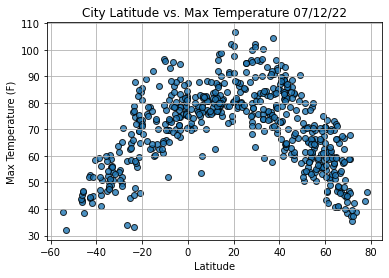

In [18]:
# Build the scatter plot for latitude vs. max temperature.
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')

plt.scatter(lats,
            max_temps,
            edgecolor = 'black', linewidth = 1, marker = 'o',
            alpha = 0.8, label = 'Cities')


# Incorporate the other graph properties.
plt.title(f'City Latitude vs. Max Temperature ' + time.strftime('%x'))
plt.ylabel("Max Temperature (F)")
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure.
plt.savefig('weather_data/Fig1.png')

# Show plot.
plt.show()

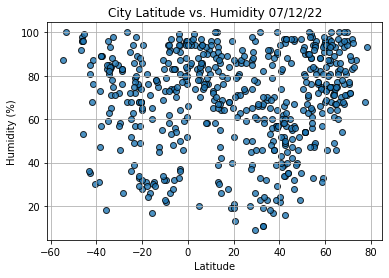

In [19]:
# Build the scatter plots for latitude vs. humidity.
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

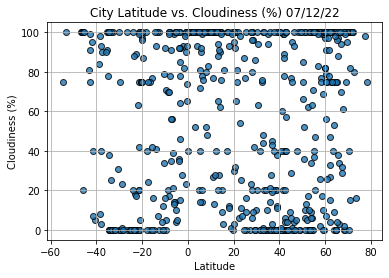

In [20]:
# Build the scatter plots for latitude vs. cloudiness.
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

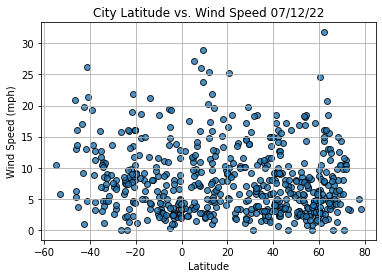

In [21]:
# Build the scatter plots for latitude vs. wind speed.
fig = plt.figure()
fig.patch.set_facecolor('xkcd:white')
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()